<a href="https://colab.research.google.com/github/vladiant/MachineLearningUtils/blob/main/Pix2Pix/Pix2PixGANpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Develop a Pix2Pix GAN for Image-to-Image Translation
## Example of loading a pix2pix model and using it for one-off image translation
https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/

### Download Test image:

https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/Example-of-a-Cropped-Satellite-Image-to-Use-as-Input-to-the-Pix2Pix-Model..jpg

In [ ]:
# Change to the folder where the images datasets are loaded/present and where the 
WORKPLACE_FOLDER = "/tmp"

In [ ]:
# https://stackabuse.com/download-files-with-python/

import requests
from os import path

print('Beginning file download with requests')

url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/05/Example-of-a-Cropped-Satellite-Image-to-Use-as-Input-to-the-Pix2Pix-Model..jpg'
local_image_file = 'satellite.jpg'
r = requests.get(url)

with open(path.join(WORKPLACE_FOLDER,local_image_file), 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print("Request status code", r.status_code)
print("Request content type", r.headers['content-type'])
print("Request encode", r.encoding)

Beginning file download with requests
Request status code 200
Request content type image/jpeg
Request encode None


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from numpy import load, expand_dims
from matplotlib import pyplot

In [ ]:
# Load an image
def load_image(filename, size=(256,256)):
	# load image with the preferred size
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	# reshape to 1 sample
	pixels = expand_dims(pixels, 0)
	return pixels

In [ ]:
# Load source image
src_image = load_image(path.join(WORKPLACE_FOLDER,local_image_file))
print('Loaded', src_image.shape)

Loaded (1, 256, 256, 3)


In [ ]:
# Load model - see previous generation
model = load_model('/model_032880.h5')

In [ ]:
# generate image from source
gen_image = model.predict(src_image)

In [ ]:
# scale from [-1,1] to [0,1]
gen_image = (gen_image + 1) / 2.0

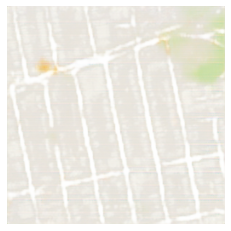

In [ ]:
# plot the image
pyplot.imshow(gen_image[0])
pyplot.axis('off')
pyplot.show()

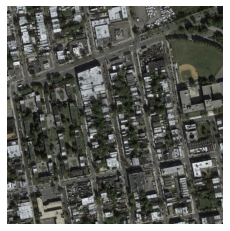

In [ ]:
# plot the source image
pyplot.imshow(load_img(path.join(WORKPLACE_FOLDER,local_image_file)))
pyplot.axis('off')
pyplot.show()